In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

In [10]:
dataset = load_dataset("fashion_mnist")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

fashion_mnist/train-00000-of-00001.parqu(…):   0%|          | 0.00/30.9M [00:00<?, ?B/s]

fashion_mnist/test-00000-of-00001.parque(…):   0%|          | 0.00/5.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [11]:
def extract_data(split):
    # Convert PIL Images from the 'image' column to numpy arrays and stack them.
    images = np.stack([np.array(img) for img in split['image']], axis=0)
    labels = np.array(split['label'])
    return images, labels

# Extract the training and test data
train_images, train_labels = extract_data(dataset["train"])
test_images, test_labels = extract_data(dataset["test"])

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Check the shape of the data
print(f"Original training image shape: {train_images.shape}")
print(f"Original test image shape: {test_images.shape}")

Original training image shape: (60000, 28, 28)
Original test image shape: (10000, 28, 28)


In [13]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [15]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f"Reshaped training image shape (for CNN): {train_images.shape}")


Reshaped training image shape (for CNN): (60000, 28, 28, 1)


In [16]:
model = Sequential([
    # Convolutional Block 1:
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)), # Reduces dimensions by half

    # Convolutional Block 2:
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), # Reduces dimensions by half again

    # Flattening: Prepares 2D feature map for Dense layers
    Flatten(),

    # Dense Classifier Layers:
    Dense(128, activation='relu'),
    Dropout(0.5), # Regularization to prevent overfitting

    # Output Layer: 10 neurons with Softmax for multi-class probabilities
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              # Loss function for integer labels with multi-class output
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.6940 - loss: 0.8467 - val_accuracy: 0.8523 - val_loss: 0.4024
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8505 - loss: 0.4191 - val_accuracy: 0.8723 - val_loss: 0.3463
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8716 - loss: 0.3548 - val_accuracy: 0.8864 - val_loss: 0.3079
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.8849 - loss: 0.3187 - val_accuracy: 0.8890 - val_loss: 0.3063
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.8940 - loss: 0.2952 - val_accuracy: 0.8990 - val_loss: 0.2728
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9007 - loss: 0.2719 - val_accuracy: 0.9027 - val_loss: 0.2637
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9050 - loss: 0.2576 - val_accuracy: 0.9008 - val_loss: 0.2645
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9090 - loss: 0.2466 - 

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest Accuracy: {test_acc*100:.2f}%')

313/313 - 2s - 7ms/step - accuracy: 0.9112 - loss: 0.2473

Test Accuracy: 91.12%


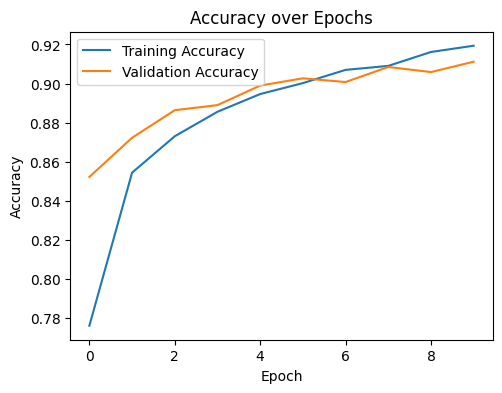

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

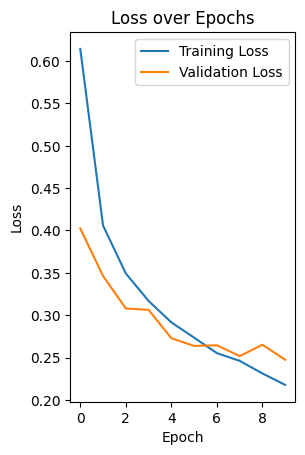

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [25]:
def plot_image_and_prediction(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'   # Incorrect prediction

    plt.xlabel(f"Prediction: {class_names[predicted_label]} ({100*np.max(predictions_array):.1f}%)",
               color=color)

In [26]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

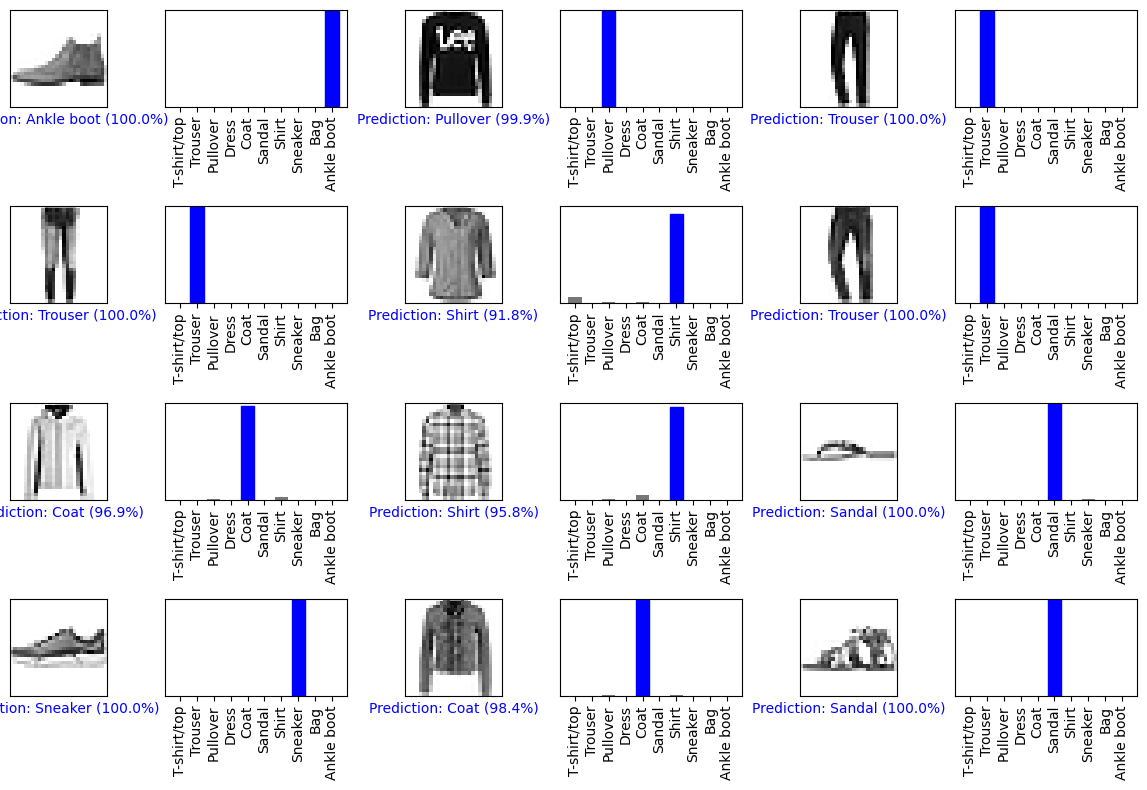

In [27]:
num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  # Image subplot
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image_and_prediction(i, predictions[i], test_labels, test_images)
  # Prediction probability subplot
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()